# Single Qubit States and Gates

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector
import math

Let's start with some helpful definitions.

In [69]:
def build(gates='', initial_state=None):
    circuit = QuantumCircuit(1)

    if initial_state:
        circuit.initialize(initial_state, 0)
    
    for gate in gates.split(' '):
        if gate == 'I':
            circuit.i(0)

        if gate == 'X':
            circuit.x(0)
        if gate == 'Y':
            circuit.y(0)
        if gate == 'Z':
            circuit.z(0)

        if gate == 'H':
            circuit.h(0)

        if gate == 'S': # 90° around Z
            circuit.s(0)
        if gate == 'Sdg': # -90° around Z
            circuit.sdg(0)

        if gate == 'T': # 45° around Z
            circuit.t(0)
        if gate == 'Tdg': # -45° around Z
            circuit.tdg(0)

        if gate == 'Rx90':
            circuit.rx(math.pi/2, 0)
        if gate == 'Ry90':
            circuit.ry(math.pi/2, 0)
        if gate == 'Rz90':
            circuit.rz(math.pi/2, 0)

        if gate == 'Rx-90':
            circuit.rx(-math.pi/2, 0)
        if gate == 'Ry-90':
            circuit.ry(-math.pi/2, 0)
        if gate == 'Rz-90':
            circuit.rz(-math.pi/2, 0)

        if gate == 'Rx45':
            circuit.rx(math.pi/4, 0)
        if gate == 'Ry45':
            circuit.ry(math.pi/4, 0)
        if gate == 'Rz45':
            circuit.rz(math.pi/4, 0)

        if gate == 'Rx-45':
            circuit.rx(-math.pi/4, 0)
        if gate == 'Ry-45':
            circuit.ry(-math.pi/4, 0)
        if gate == 'Rz-45':
            circuit.rz(-math.pi/4, 0)

    return circuit

In [59]:
def draw(circuit):
    return circuit.draw(output='mpl')

In [60]:
def unitary(circuit):
    unitary = execute(circuit, Aer.get_backend('unitary_simulator')).result().get_unitary()
    pretty_unitary = ''
    for row in range(len(unitary)):
        pretty_unitary += '|'
        for column in range(len(unitary[row])):
            value = unitary[row][column]
            if math.isclose(value.imag, 0, abs_tol=0.01):
                pretty_value = '{num.real:>-.2f}'.format(num=value)
            elif math.isclose(value.real, 0, abs_tol=0.01):
                pretty_value = '{num.imag:>-.2f}i'.format(num=value)
            else:
                pretty_value = '{num.real:>-.2f}+{num.imag:>-.2f}i'.format(num=value)
            
            pretty_unitary += pretty_value
            if column < len(unitary[row])-1:
                pretty_unitary += ' '
        pretty_unitary += '|\n'
    print(pretty_unitary)

In [61]:
def bloch(circuit):
    return plot_bloch_multivector(execute(circuit, Aer.get_backend('statevector_simulator')).result().get_statevector())

## Rotations

By default the circuit starts with an empty wire:

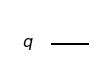

In [62]:
circuit = build()
draw(circuit)

The associated unitary matrix is just the Identity matrix:

In [63]:
unitary(circuit)

|1.00 0.00|
|0.00 1.00|



And the default state is one of the two eigenvectors of the Z-basis, called $|0\rangle$ (the other one is $|1\rangle$).

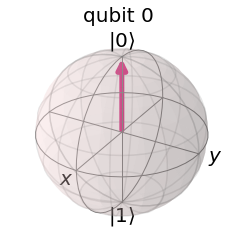

In [64]:
bloch(circuit)

From here we could start rotating the vector around with a few rotation gates. Let's rotate it -45° around the X-axis:

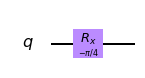

In [65]:
circuit = build('Rx-45')
draw(circuit)

In [10]:
unitary(circuit)

|0.92 0.38i|
|0.38i 0.92|



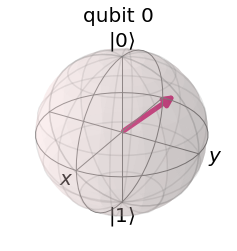

In [11]:
bloch(circuit)

Let's try now combining a rotation around X and a rotation around Y:

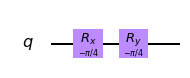

In [12]:
circuit = build('Rx-45 Ry-45')
draw(circuit)

In [13]:
unitary(circuit)

|0.87 0.41+0.29i|
|-0.29+0.41i 0.82+-0.29i|



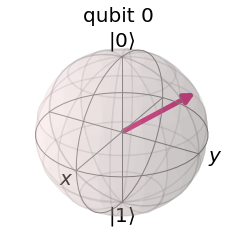

In [14]:
bloch(circuit)

If we apply the Identity gate, the result is as having no gate at all. But sometimes the Identity matrix is useful for calculations on unitary matrices.

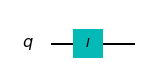

In [15]:
circuit = build('I')
draw(circuit)

The unitary matrix for this circuit corresponds to the default matrix we saw earlier:

In [16]:
unitary(circuit)

|1.00 0.00|
|0.00 1.00|



And the circuit remains in the state $|0\rangle$:

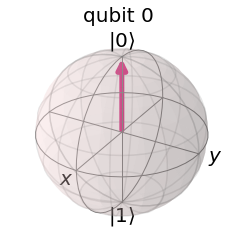

In [17]:
bloch(circuit)

## Pauli gates in the Z-basis

The three Pauli gates are named $X$, $Y$, and $Z$. They have different behaviours according to the current state of the vector.

$X$ is equivalent to a rotation of 180° around the X-axis and will flip the value from $|0\rangle$ to $|1\rangle$:

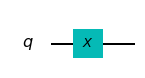

In [18]:
circuit = build('X')
draw(circuit)

In [19]:
unitary(circuit)

|0.00 1.00|
|1.00 0.00|



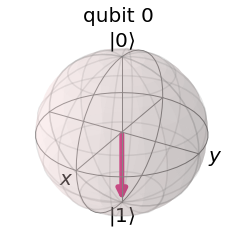

In [20]:
bloch(circuit)

If we use it again, the value will be flipped again to its original state:

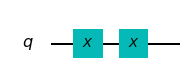

In [21]:
circuit = build('X X')
draw(circuit)

In [22]:
unitary(circuit)

|1.00 0.00|
|0.00 1.00|



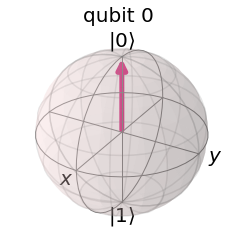

In [23]:
bloch(circuit)

The $Y$ gate, a rotation of 180° around the Y-axis, also affects the Z-basis eigenvectors, but adds an extra global phase of $i$ so it isn't commonly used.

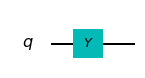

In [24]:
circuit = build('Y')
draw(circuit)

In [25]:
unitary(circuit)

|0.00 -1.00i|
|1.00i 0.00|



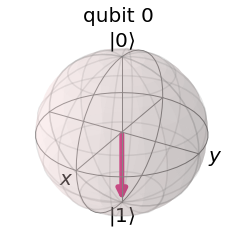

In [26]:
bloch(circuit)

The $Z$ gate instead doesn't affect the Z-basis eigenvectors, since it corresponds to a rotation of 180° around the Z-axis.

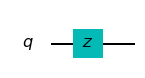

In [27]:
circuit = build('Z')
draw(circuit)

In [28]:
unitary(circuit)

|1.00 0.00|
|0.00 -1.00|



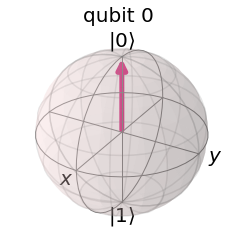

In [29]:
bloch(circuit)

## Gates in the X-basis

Eigenvectors in the X-basis are the superpositions $|+\rangle$ and $|-\rangle$. We could obtain the first one by applying a rotation of 90° around the Y axis:

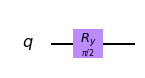

In [30]:
circuit = build('Ry90')
draw(circuit)

In [31]:
unitary(circuit)

|0.71 -0.71|
|0.71 0.71|



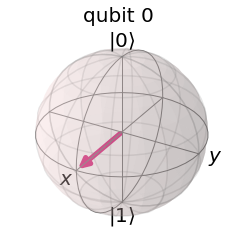

In [32]:
bloch(circuit)

However we usually prefer using Hadamard gates, even though the result is the same:

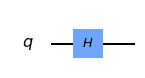

In [33]:
circuit = build('H')
draw(circuit)

In [34]:
unitary(circuit)

|0.71 0.71|
|0.71 -0.71|



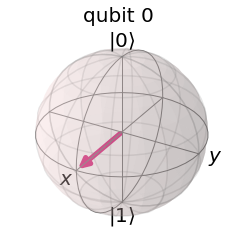

In [35]:
bloch(circuit)

It looks like the H gate just turns the vector 90°, but it's actually more complex: in fact, using it twice will revert the vector back.

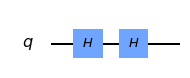

In [36]:
circuit = build('H H')
draw(circuit)

In [37]:
unitary(circuit)

|1.00 0.00|
|0.00 1.00|



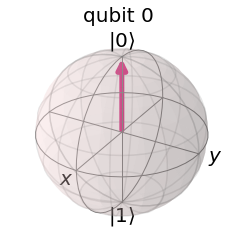

In [38]:
bloch(circuit)

The H gate can be thought of as a combination of a 180° rotation around the X-axis and a -90° rotation around the Y-axis:

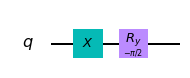

In [39]:
circuit = build('X Ry-90')
draw(circuit)

In [40]:
unitary(circuit)

|0.71 0.71|
|0.71 -0.71|



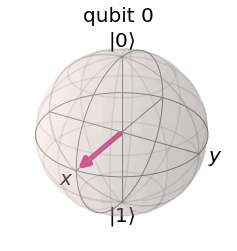

In [41]:
bloch(circuit)

Once we are in an X-basis state like $|+\rangle$ we can use some standard gates to rotate around the Z-axis. The are no standard rotation gates for the X- and Y-axis, because they are not used so frequently.

The $S$ gate rotates 90°, while $S\dagger$ rotates counter-clockwise by the same amount:

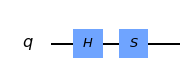

In [42]:
circuit = build('H S')
draw(circuit)

In [43]:
unitary(circuit)

|0.71 0.71|
|0.71i -0.71i|



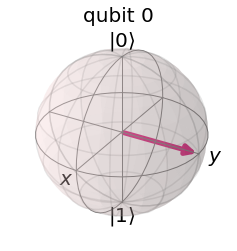

In [44]:
bloch(circuit)

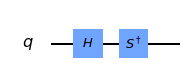

In [45]:
circuit = build('H Sdg')
draw(circuit)

In [46]:
unitary(circuit)

|0.71 0.71|
|-0.71i 0.71i|



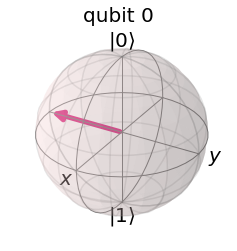

In [47]:
bloch(circuit)

Similarly the $T$ gate rotates 45°, while $T\dagger$ rotates counter-clockwise by the same amount:

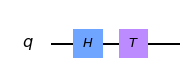

In [48]:
circuit = build('H T')
draw(circuit)

In [49]:
unitary(circuit)

|0.71 0.71|
|0.50+0.50i -0.50+-0.50i|



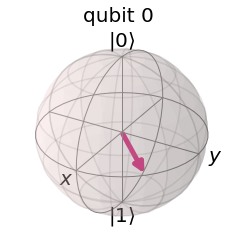

In [50]:
bloch(circuit)

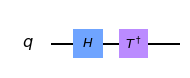

In [73]:
circuit = build('H Tdg')
draw(circuit)

In [74]:
unitary(circuit)

|0.71 0.71|
|0.50+-0.50i -0.50+0.50i|



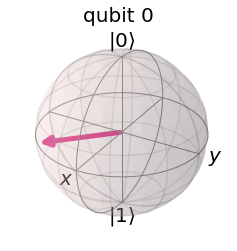

In [75]:
bloch(circuit)

If we are in a state like $|+\rangle$, in order to go back to our Z-state we just need to apply another Hadamard gate again:

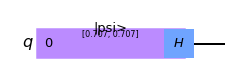

In [76]:
plus_ket = [1/math.sqrt(2), 1/math.sqrt(2)]
circuit = build('H', initial_state=plus_ket)
draw(circuit)

In [77]:
unitary(circuit)

|1.00 0.00|
|0.00 -1.00|



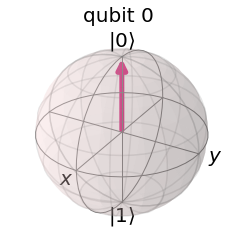

In [78]:
bloch(circuit)